In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.exceptions import ConvergenceWarning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
data='/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv'
df = pd.read_csv(data)

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.700,0.100,187,16,18,6.800,3.300,0.900,1
1,62,Male,10.900,5.500,699,64,100,7.500,3.200,0.740,1
2,62,Male,7.300,4.100,490,60,68,7.000,3.300,0.890,1
3,58,Male,1.000,0.400,182,14,20,6.800,3.400,1.000,1
4,72,Male,3.900,2.000,195,27,59,7.300,2.400,0.400,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
missing_values = df[df['Albumin_and_Globulin_Ratio'].isnull()]
print(missing_values)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female            0.900             0.300                   189   
241   51    Male            0.800             0.200                   230   
253   35  Female            0.600             0.200                   180   
312   27    Male            1.300             0.600                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33           6.600   
241                        24                          46           6.500   
253                        12                          15           5.200   
312                        25                          54           8.500   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
209    3.900                         NaN        1  
241    3.100                         NaN        1  
253    2.700                         NaN        2  
312    4.800        

In [7]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000,583.000,583.000,583.000,583.000,583.000,583.000,583.000,583.000,583.000
mean,44.746,3.299,1.486,290.576,80.714,109.911,6.483,3.142,0.947,1.286
std,16.190,6.210,2.808,242.938,182.620,288.919,1.085,0.796,0.318,0.452
min,4.000,0.400,0.100,63.000,10.000,10.000,2.700,0.900,0.300,1.000
25%,33.000,0.800,0.200,175.500,23.000,25.000,5.800,2.600,0.700,1.000
50%,45.000,1.000,0.300,208.000,35.000,42.000,6.600,3.100,0.930,1.000
75%,58.000,2.600,1.300,298.000,60.500,87.000,7.200,3.800,1.100,2.000
max,90.000,75.000,19.700,2110.000,2000.000,4929.000,9.600,5.500,2.800,2.000


In [10]:
df.rename(columns={'Age':'age',
                   'Gender':'gender',
                  'Total_Bilirubin': 'total_bilirubin',
                  'Direct_Bilirubin': 'direct_bilirubin',
                  'Alkaline_Phosphotase':'alp',
                  'Alamine_Aminotransferase':'alt',
                   'Aspartate_Aminotransferase':'ast',
                  'Total_Protiens':'total_protein',
                  'Albumin':'albumin',
                  'Albumin_and_Globulin_Ratio':'a/g_ratio',
                  'Dataset':'dataset'}, inplace=True)

In [11]:
df.columns

Index(['age', 'gender', 'total_bilirubin', 'direct_bilirubin', 'alp', 'alt',
       'ast', 'total_protein', 'albumin', 'a/g_ratio', 'dataset'],
      dtype='object')

In [12]:
df.head()

,age,gender,total_bilirubin,direct_bilirubin,alp,alt,ast,total_protein,albumin,a/g_ratio,dataset
0,65,Female,0.700,0.100,187,16,18,6.800,3.300,0.900,1
1,62,Male,10.900,5.500,699,64,100,7.500,3.200,0.740,1
2,62,Male,7.300,4.100,490,60,68,7.000,3.300,0.890,1
3,58,Male,1.000,0.400,182,14,20,6.800,3.400,1.000,1
4,72,Male,3.900,2.000,195,27,59,7.300,2.400,0.400,1


In [13]:
df.duplicated().sum()

13

In [14]:
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

### EDA

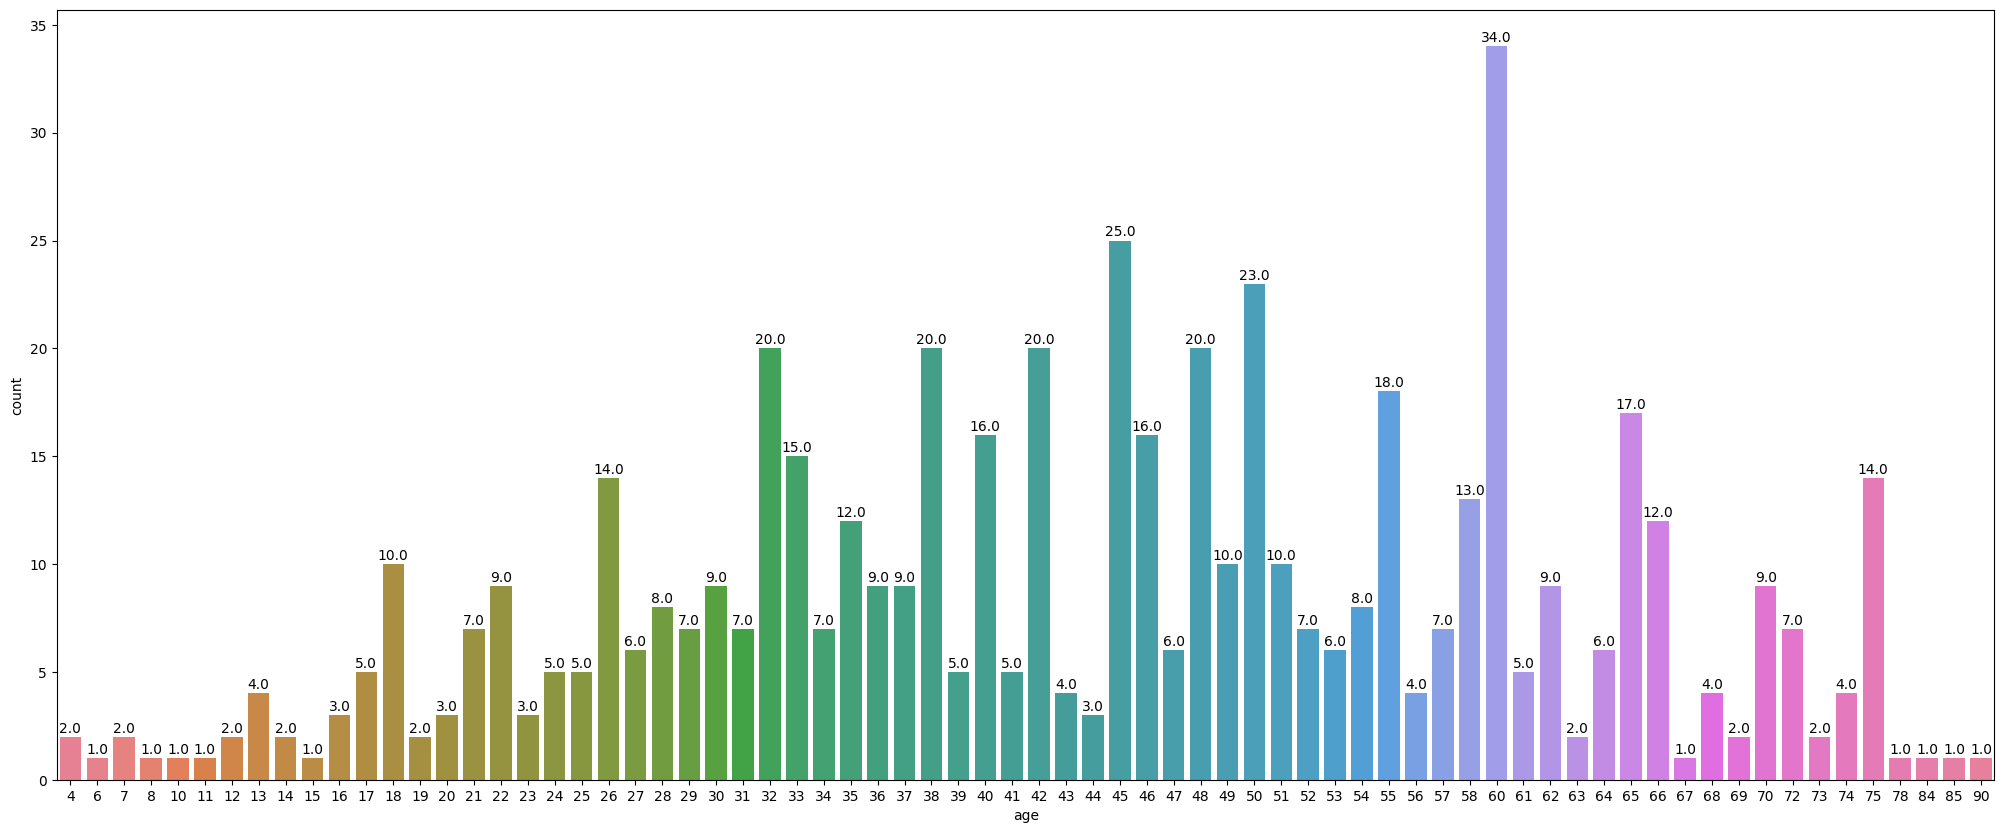

In [16]:
plt.figure(figsize=(25,10))
b = sns.countplot(data=df, x='age', palette='husl')
for bar in b.patches:
    b.annotate(format(bar.get_height()),
               (bar.get_x() + bar.get_width() / 2, bar.get_height()),
               ha='center', va='center', size=10, xytext=(0, 6),
               textcoords='offset points')
plt.show()

In [17]:
df['gender'].value_counts()

gender
Male      430
Female    140
Name: count, dtype: int64

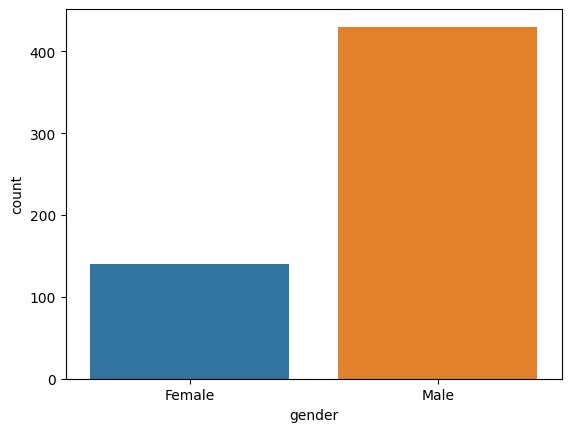

In [18]:
sns.countplot(data=df, x=df['gender'])
plt.show()

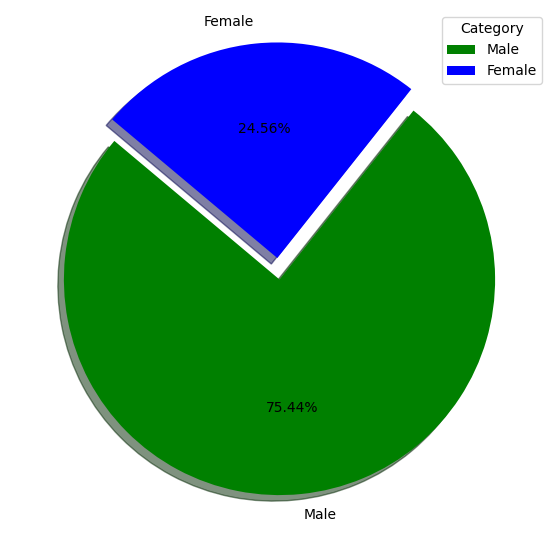

In [19]:
plt.figure(figsize=(7, 7))
labels = ['Male', 'Female']
size = df['gender'].value_counts()
colors = ['green', 'blue']
explode = [0, 0.1]
plt.pie(size, labels=labels, colors=colors, explode=explode, autopct='%.2f%%', shadow=True, startangle=140)

plt.legend(labels, loc=0, title='Category')
plt.show()

In [20]:
one = df['dataset'].value_counts()[1]
one

406

In [21]:
two = df['dataset'].value_counts()[2]
two

164

In [22]:
p_1 = one / (one + two)
print('Liver patient percentage: %', p_1*100)

Liver patient percentage: % 71.2280701754386


In [23]:
p_2 = two / (one + two)
print('Non-Liver patient: %', p_2*100)

Non-Liver patient: % 28.771929824561404


In [24]:
dff = df[['total_bilirubin','direct_bilirubin','total_protein', 'albumin', 'a/g_ratio']]

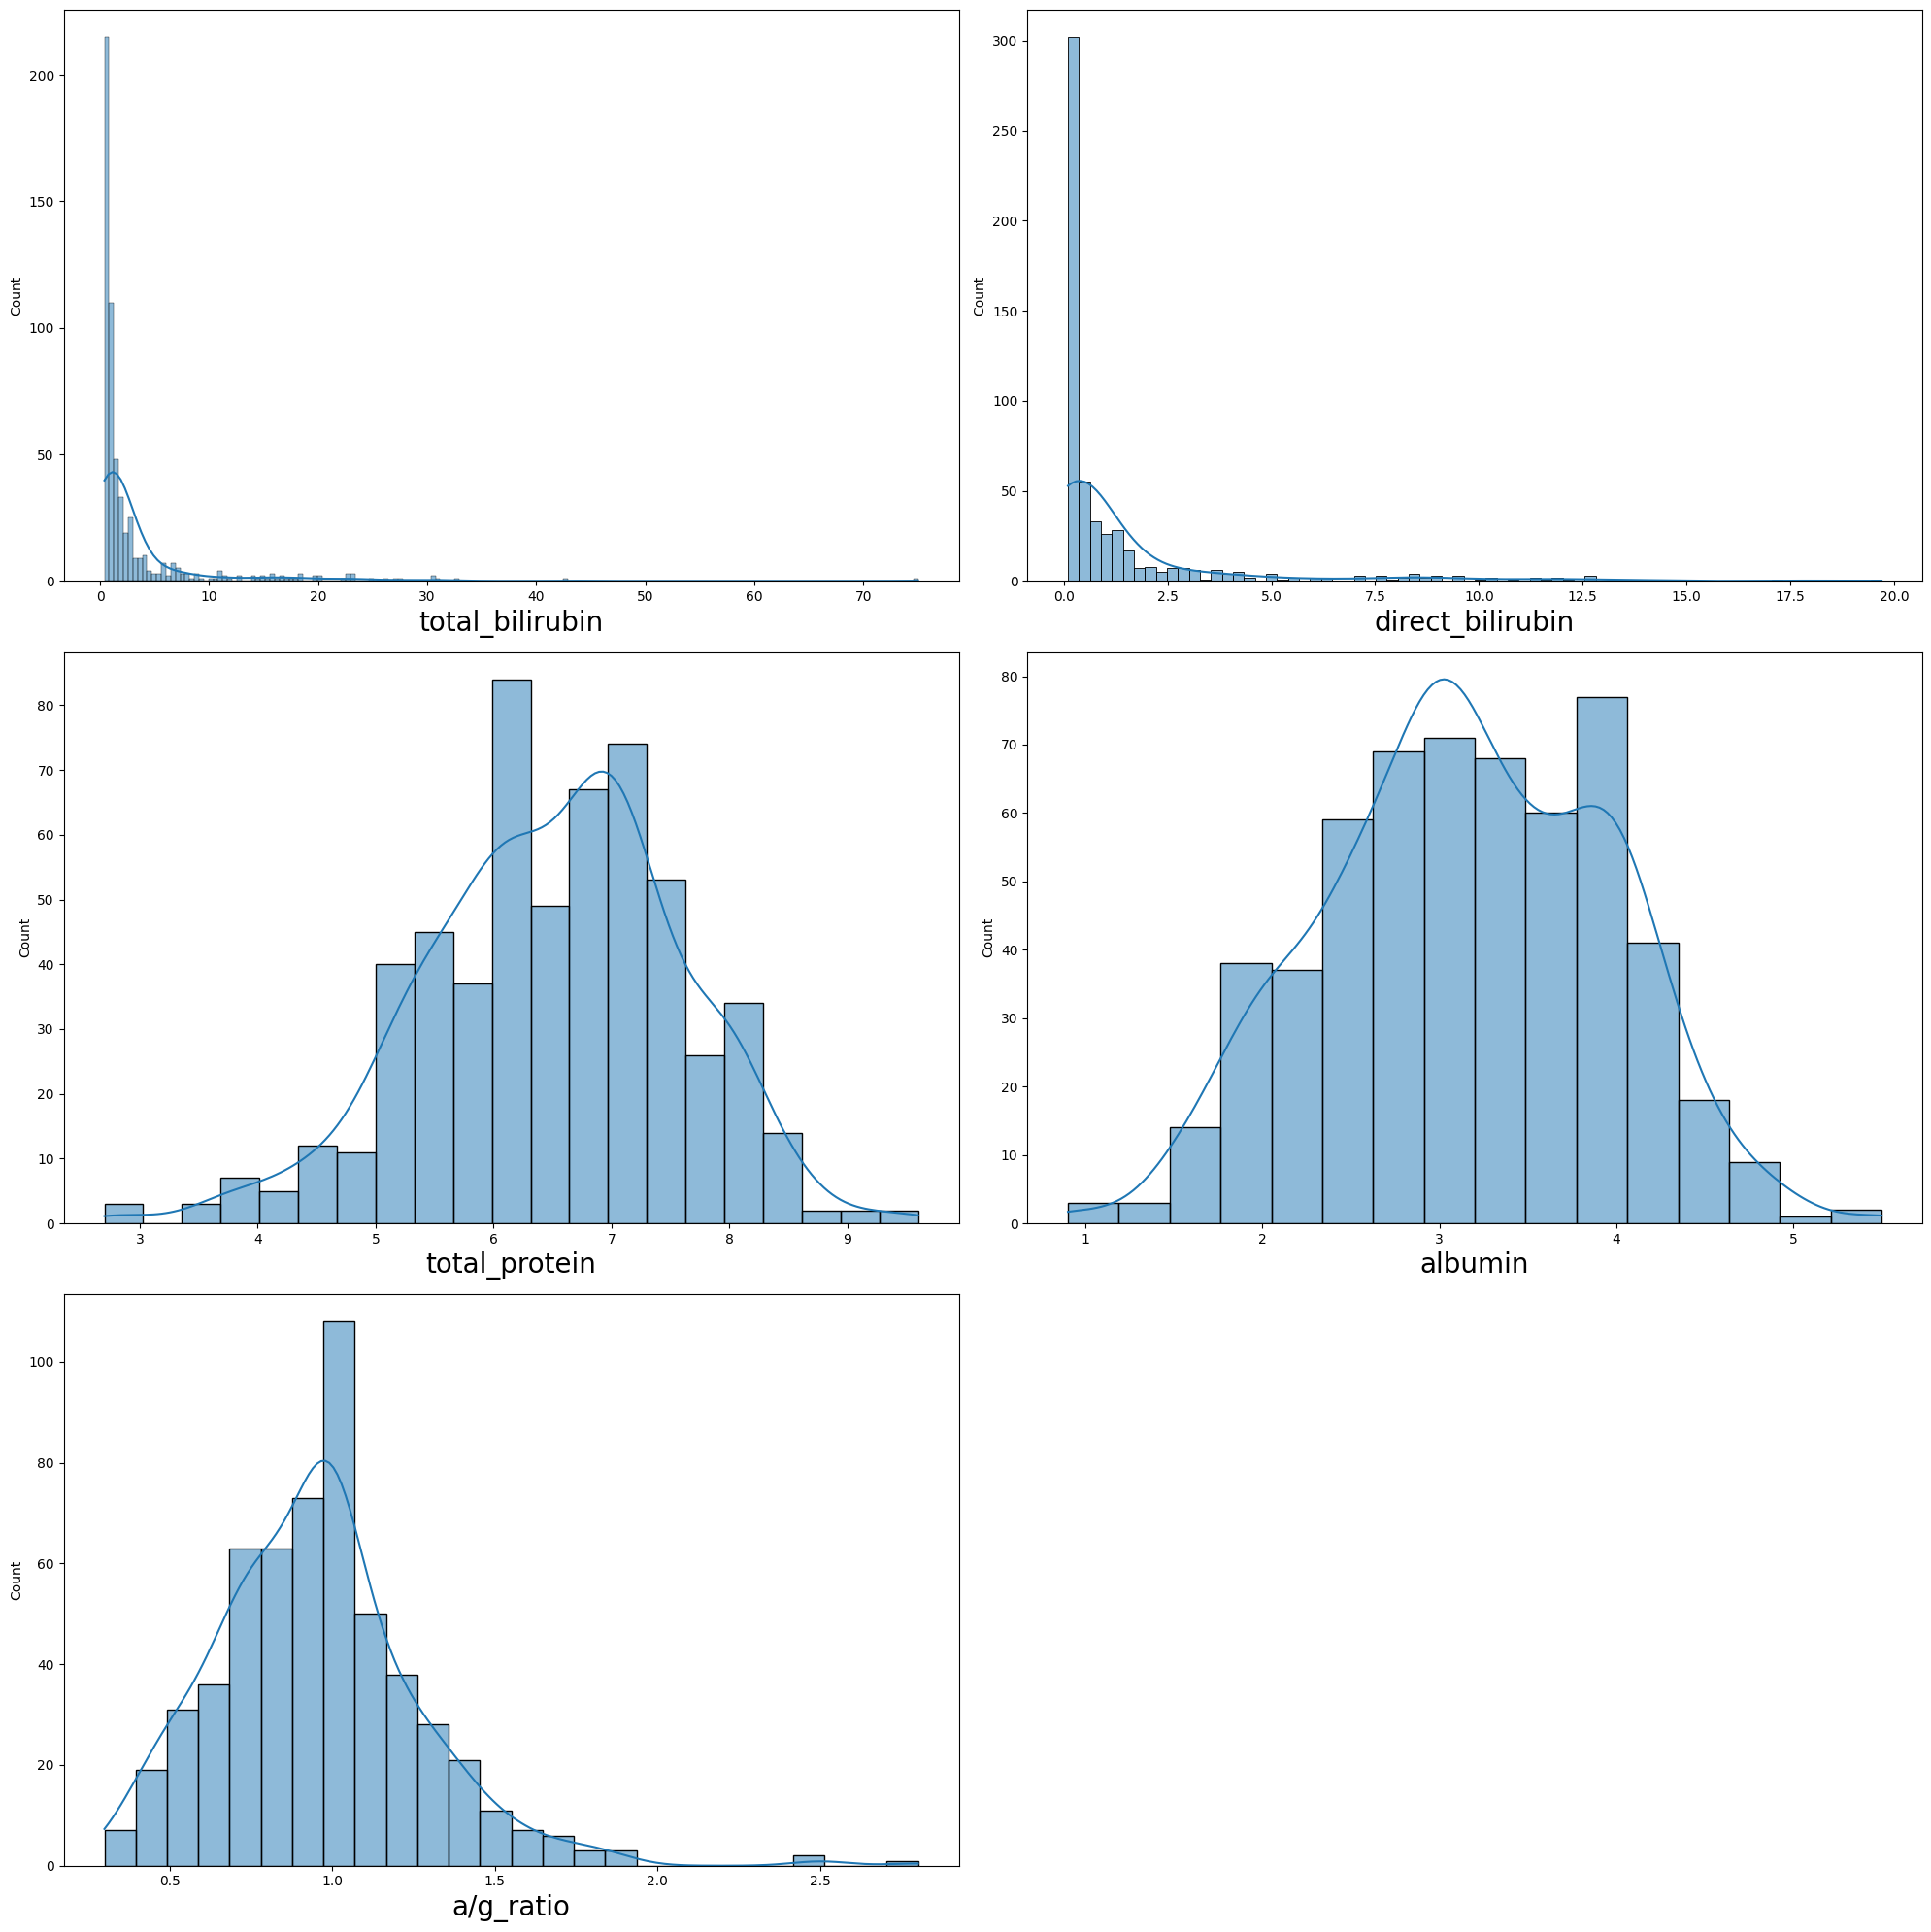

In [25]:
plt.figure(figsize=(20,20))
plotnumber = 1

for column in dff:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(data=dff, x=column, kde=True)
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
        
plt.tight_layout()        
plt.show()        

In [26]:
dfx = df[['alp','ast','alt']]

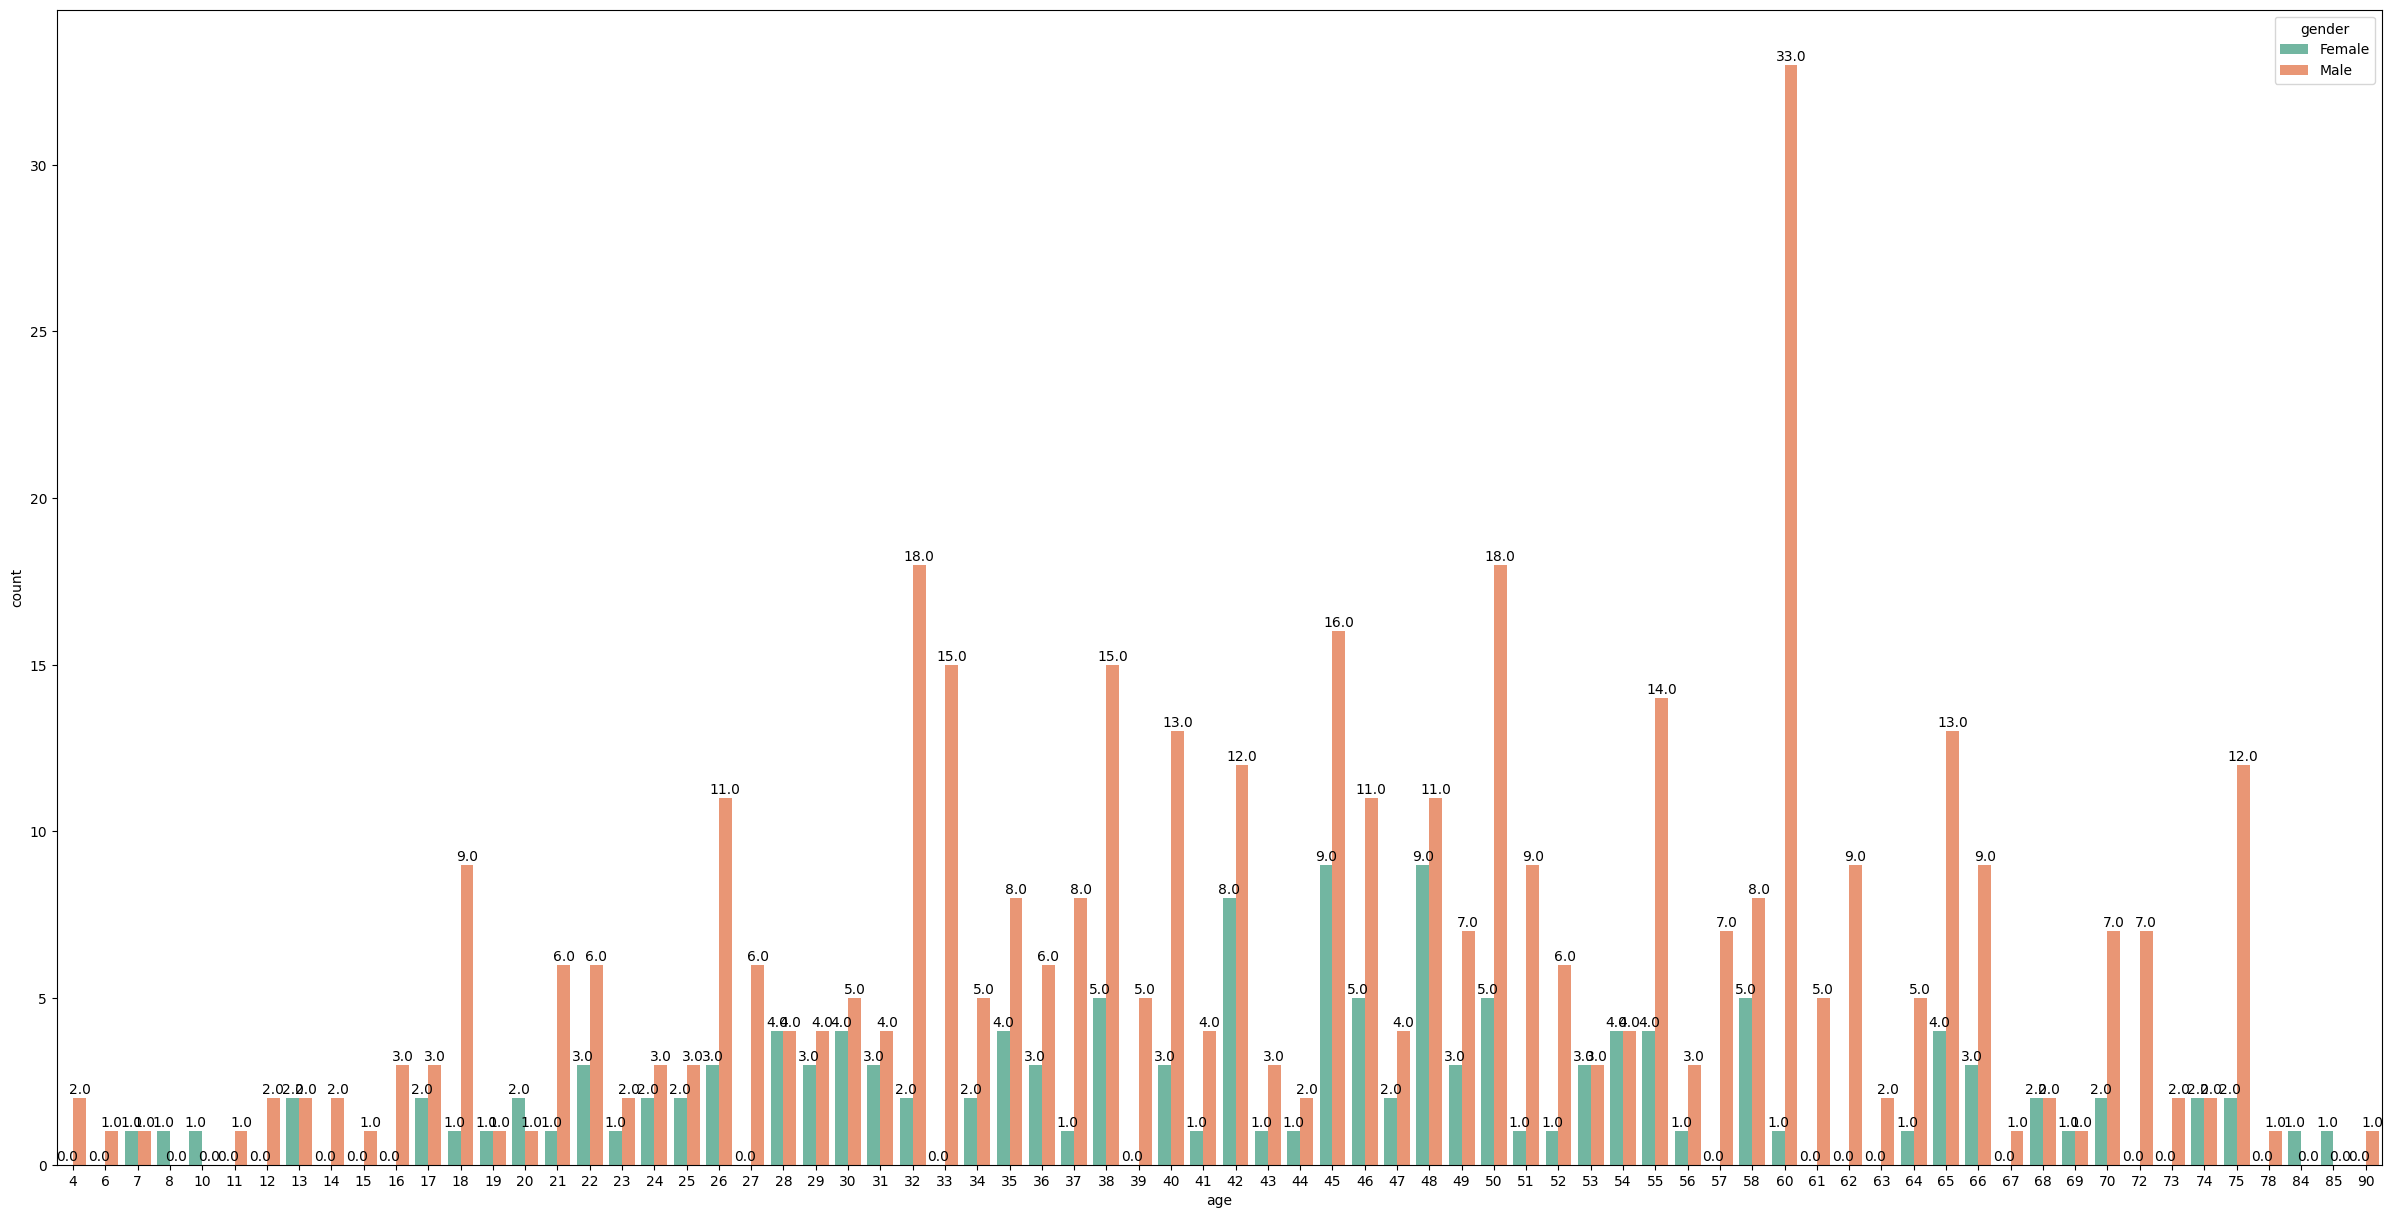

In [27]:
plt.figure(figsize=(30, 15))
b = sns.countplot(x=df['age'], hue=df['gender'], palette='Set2')
for bar in b.patches:
    b.annotate(format(bar.get_height()),
               (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
               ha='center', 
               va='center',
               size=10,
               xytext=(0, 6),
               textcoords='offset points')

plt.show()

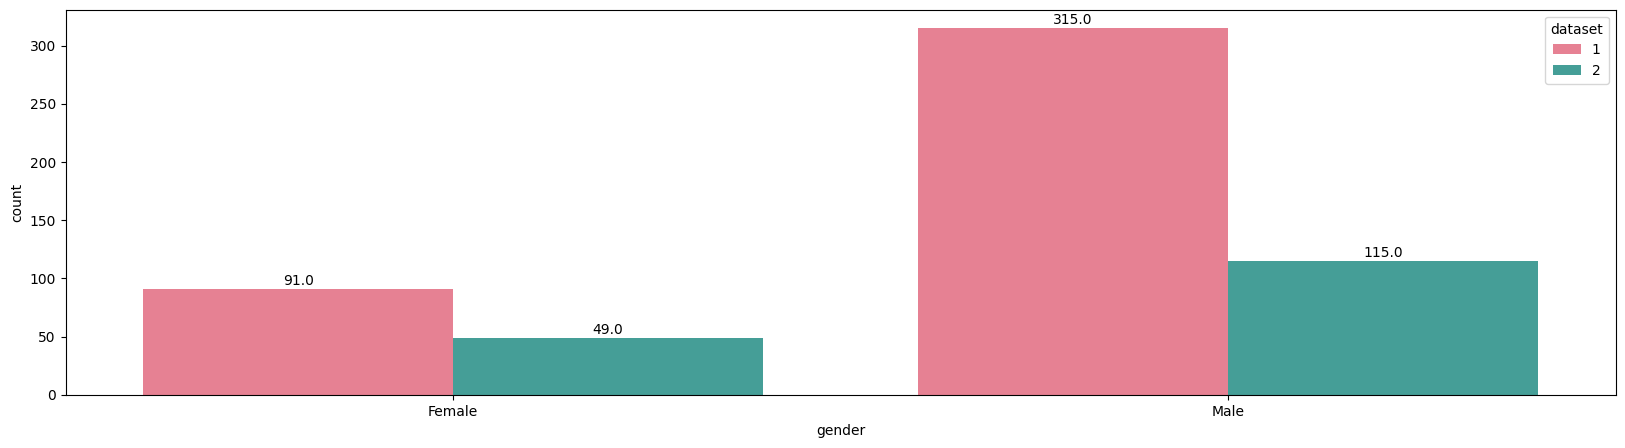

In [28]:
plt.figure(figsize=(20, 5))
sns.countplot(x='gender', hue='dataset', palette='husl', data=df)

for patch in plt.gca().patches:
    plt.gca().annotate(format(patch.get_height()), 
                       (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                       ha='center', va='center', size=10, xytext=(0, 6), textcoords='offset points')

plt.show()

- **91 Female has liver disease**

- **315 Male has liver disease**

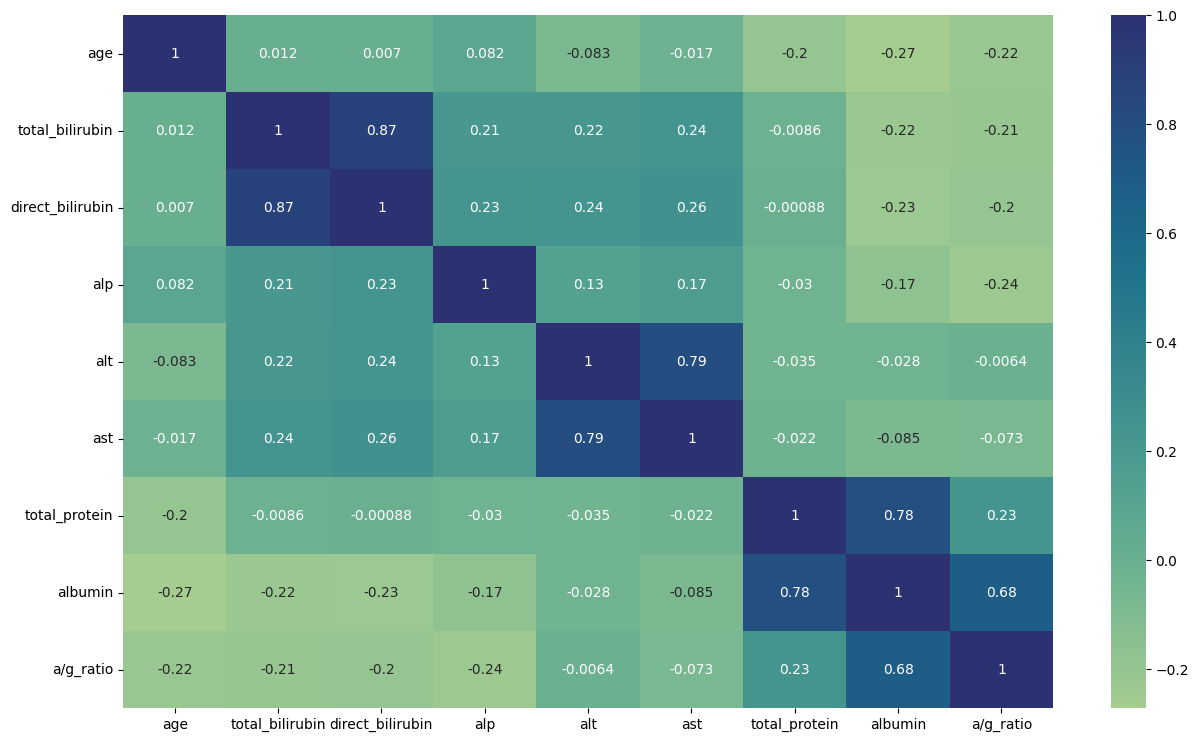

In [29]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.drop(columns=['gender', 'dataset']).corr(),
            annot=True,
            cmap='crest')
plt.show()

- **total_bilirubin and direct_bilirubin correlation is high!**
- **ast and alt corelation is high!**
- **albumin and total_protein coreelation is high!**
- **a/a_ratio and albumin corealtion is high!** 

In [30]:
dfr = df.drop(['gender','dataset'], axis=1)
dfr.head()

,age,total_bilirubin,direct_bilirubin,alp,alt,ast,total_protein,albumin,a/g_ratio
0,65,0.700,0.100,187,16,18,6.800,3.300,0.900
1,62,10.900,5.500,699,64,100,7.500,3.200,0.740
2,62,7.300,4.100,490,60,68,7.000,3.300,0.890
3,58,1.000,0.400,182,14,20,6.800,3.400,1.000
4,72,3.900,2.000,195,27,59,7.300,2.400,0.400


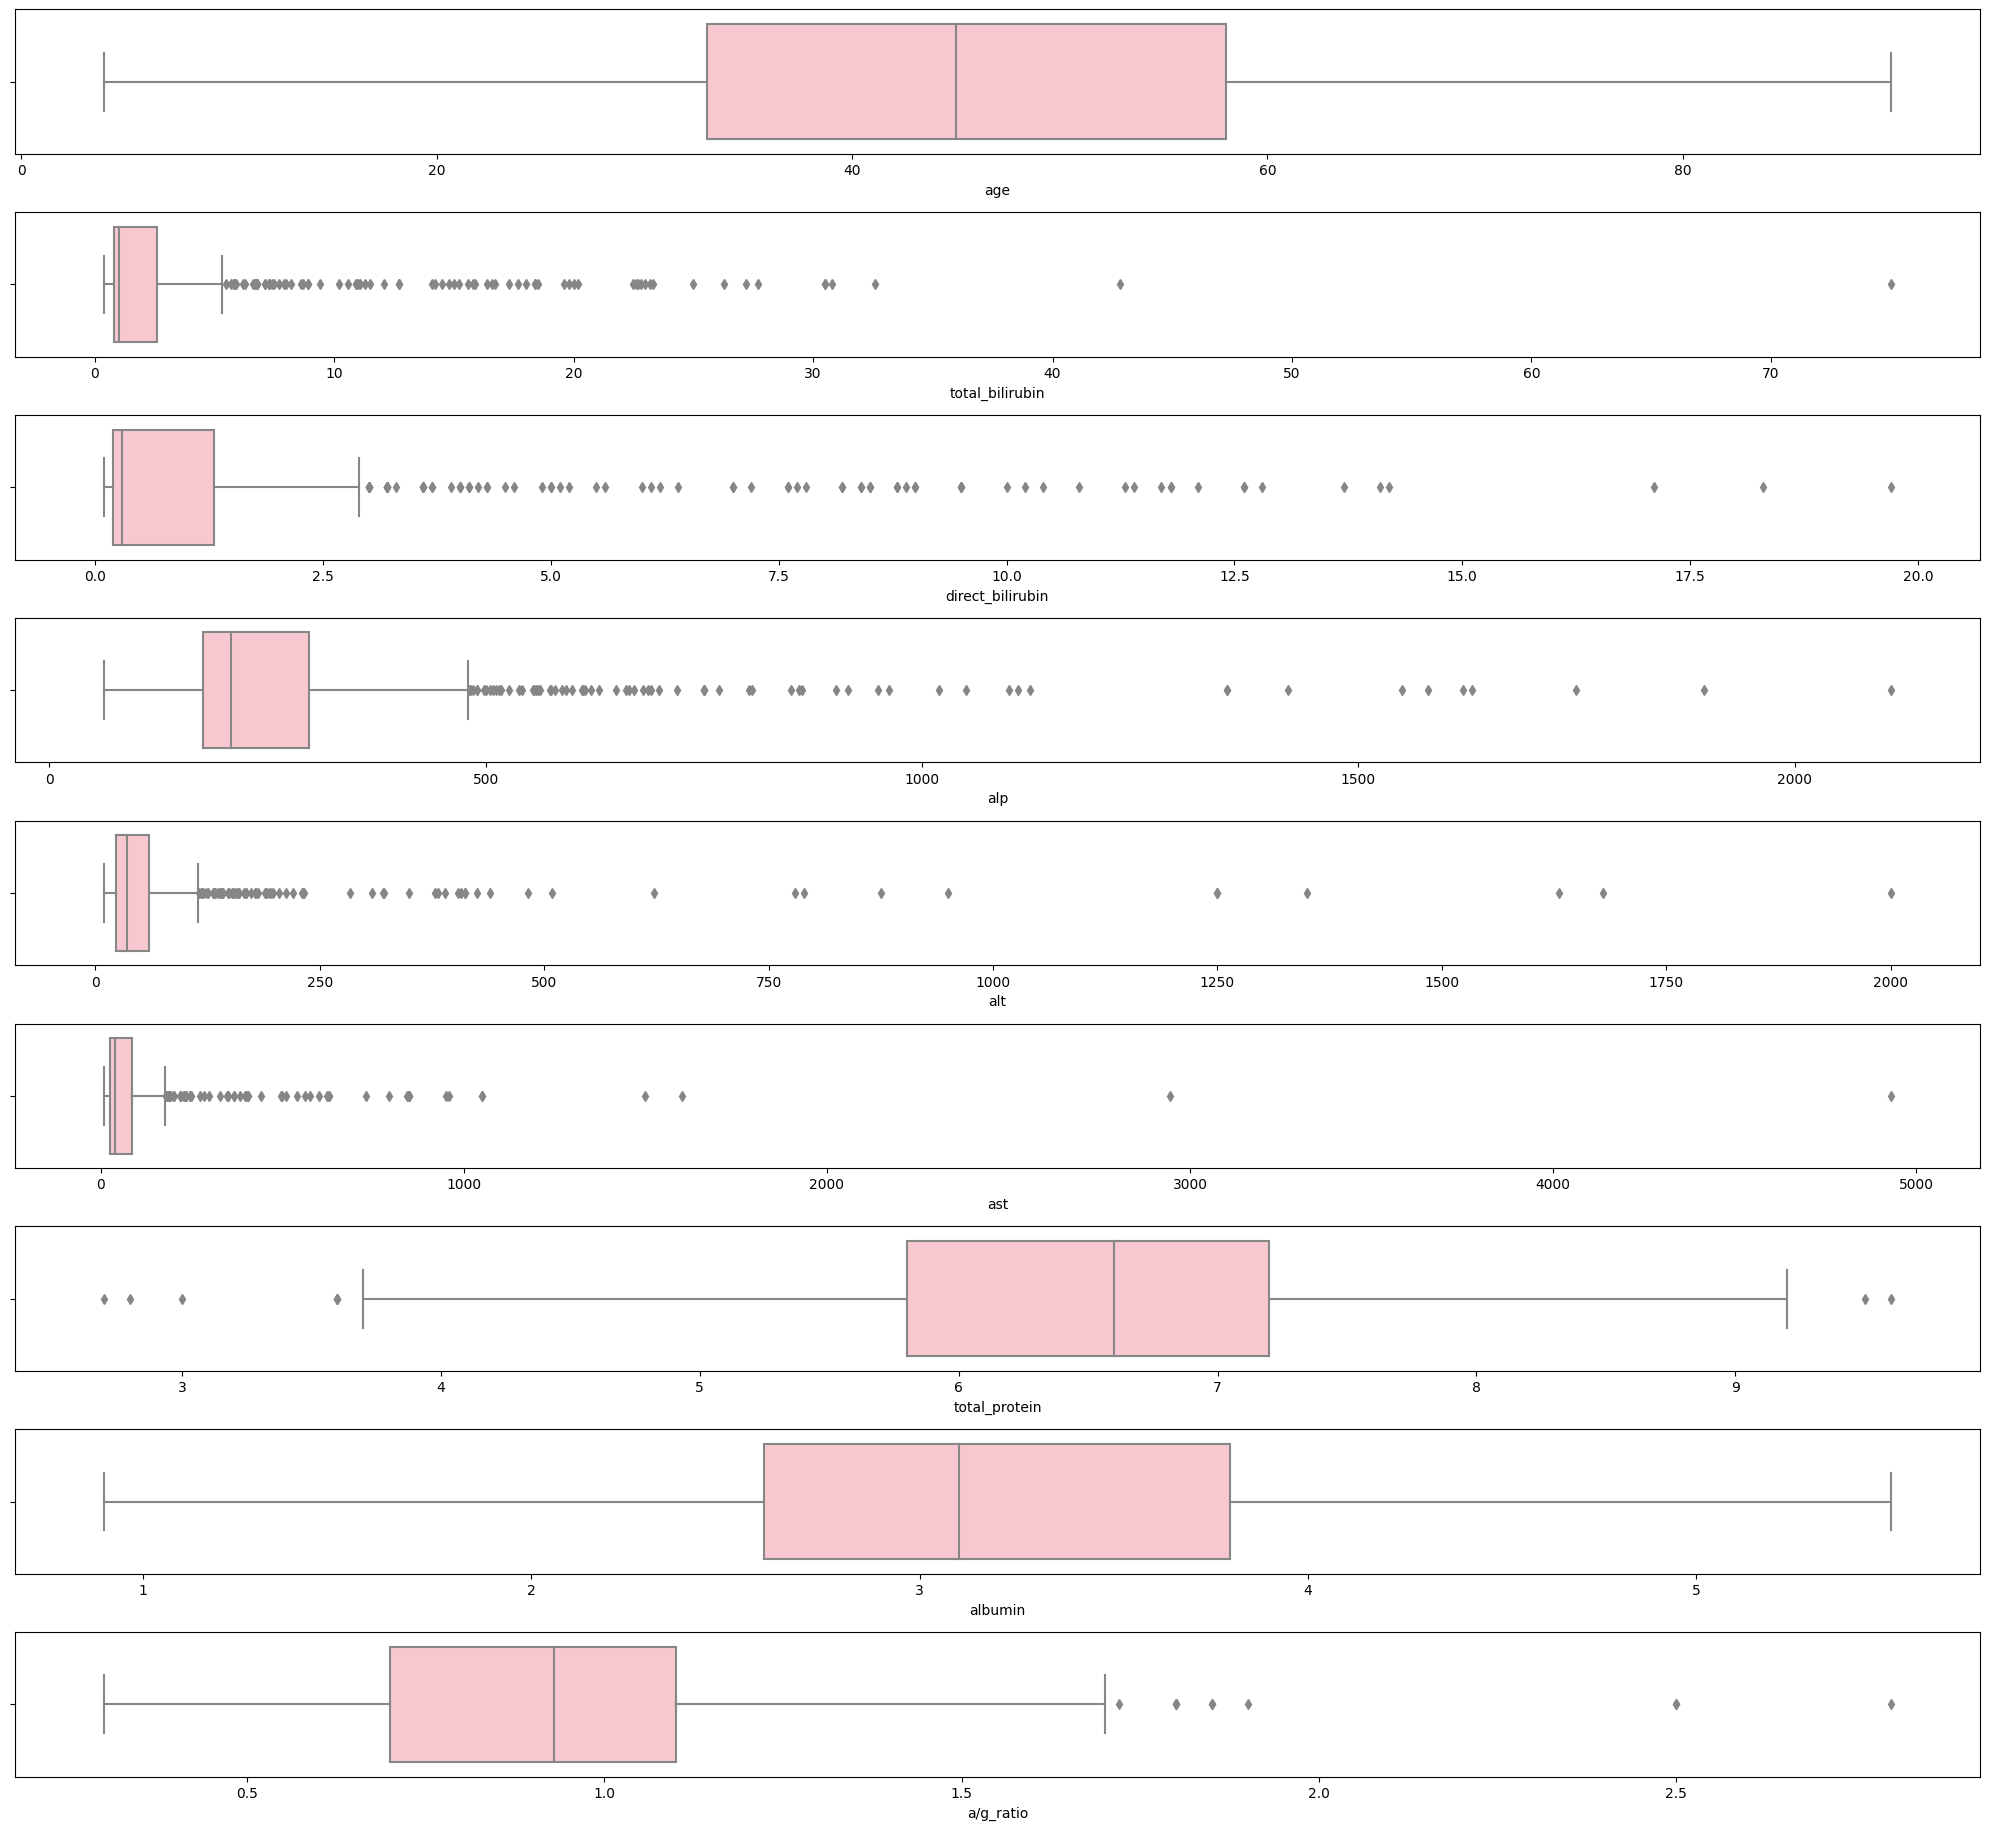

In [31]:
plt.figure(figsize=(20, 20))

plotnumber = 1
for c in dfr.columns:
    ax = plt.subplot(10, 1, plotnumber)
    sns.boxplot(x=dfr[c], color='pink')  
    plotnumber += 1

plt.tight_layout()
plt.show()   

### Encoding

In [32]:
encoder = LabelEncoder()

In [33]:
df['gender_encoded'] = encoder.fit_transform(df['gender'])

In [34]:
df.head()

,age,gender,total_bilirubin,direct_bilirubin,alp,alt,ast,total_protein,albumin,a/g_ratio,dataset,gender_encoded
0,65,Female,0.700,0.100,187,16,18,6.800,3.300,0.900,1,0
1,62,Male,10.900,5.500,699,64,100,7.500,3.200,0.740,1,1
2,62,Male,7.300,4.100,490,60,68,7.000,3.300,0.890,1,1
3,58,Male,1.000,0.400,182,14,20,6.800,3.400,1.000,1,1
4,72,Male,3.900,2.000,195,27,59,7.300,2.400,0.400,1,1


In [35]:
dfe = df.drop('gender', axis=1)

In [36]:
dfe.head()

,age,total_bilirubin,direct_bilirubin,alp,alt,ast,total_protein,albumin,a/g_ratio,dataset,gender_encoded
0,65,0.700,0.100,187,16,18,6.800,3.300,0.900,1,0
1,62,10.900,5.500,699,64,100,7.500,3.200,0.740,1,1
2,62,7.300,4.100,490,60,68,7.000,3.300,0.890,1,1
3,58,1.000,0.400,182,14,20,6.800,3.400,1.000,1,1
4,72,3.900,2.000,195,27,59,7.300,2.400,0.400,1,1


### Modeling

In [37]:
y = dfe['dataset']
X = dfe.drop(['dataset'], axis=1) 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [39]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_pred_lr = lr.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred_lr)
print('Accuracy Score:', accuracy)

Accuracy Score: 0.7280701754385965


In [42]:
report_log = classification_report(y_test, y_pred_lr)
print(report_log)

              precision    recall  f1-score   support

           1       0.78      0.89      0.83        85
           2       0.44      0.24      0.31        29

    accuracy                           0.73       114
   macro avg       0.61      0.57      0.57       114
weighted avg       0.69      0.73      0.70       114



### KNN

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
y_pred_knn = knn.predict(X_test)

In [45]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy Score:', accuracy_knn)

Accuracy Score: 0.6491228070175439


In [46]:
report_log = classification_report(y_test, y_pred_knn)
print(report_log)

              precision    recall  f1-score   support

           1       0.76      0.76      0.76        85
           2       0.31      0.31      0.31        29

    accuracy                           0.65       114
   macro avg       0.54      0.54      0.54       114
weighted avg       0.65      0.65      0.65       114



 ### Decision Tree

In [47]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
y_pred_dt = dt.predict(X_test)

In [49]:
accuracy2 = accuracy_score(y_test, y_pred_dt)
print('Accuracy Score:', accuracy2)

Accuracy Score: 0.5350877192982456


### SVC

In [50]:
svm= SVC(kernel='linear') 
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [51]:
y_pred_svc = svm.predict(X_test)

In [52]:
accuracy3 = accuracy_score(y_test, y_pred_svc)
print('Accuracy Score:', accuracy3)

Accuracy Score: 0.7368421052631579


### LightGBM

In [53]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 135, number of negative: 321
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 551
[LightGBM] [Info] Number of data points in the train set: 456, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.296053 -> initscore=-0.866166
[LightGBM] [Info] Start training from score -0.866166
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier()

In [54]:
y_pred_lgbm = lgbm.predict(X_test)

In [55]:
accuracy4 = accuracy_score(y_test, y_pred_lgbm)
print('Accuracy Score:', accuracy4)

Accuracy Score: 0.6842105263157895


### Naive Bayes

In [56]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [57]:
y_pred_nb = nb.predict(X_test)

In [58]:
accuracy5 = accuracy_score(y_test, y_pred_nb)
print('Accuracy Score:', accuracy5)

Accuracy Score: 0.5175438596491229


### Multi Layer Perceptron

In [59]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [60]:
y_pred_mlp = mlp.predict(X_test)

In [61]:
accuracy6 = accuracy_score(y_test, y_pred_mlp)
print('Accuracy Score:', accuracy6)

Accuracy Score: 0.7368421052631579


In [62]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
}

In [63]:
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=42),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (200,)],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [64]:
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [65]:
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best Accuracy: 0.7061872909698996


In [66]:
best_mlp = MLPClassifier(max_iter=500, random_state=42, **best_params)
best_mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.001, max_iter=500, random_state=42)

In [67]:
y_pred_best_params= best_mlp.predict(X_test)

In [68]:
accuracy7 = accuracy_score(y_test, y_pred_best_params)
print('Test Accuracy Score:', accuracy7)

Test Accuracy Score: 0.7368421052631579


- **Logistic Regression Accuracy Score: 0.7280701754385965**
- **KNN Accuracy Score: 0.6491228070175439**
- **Decision Tree Accuracy Score: 0.5964912280701754**
- **SVC Accuracy Score: 0.7368421052631579**
- **LightGBM Accuracy Score: 0.6842105263157895**
- **Naive Bayes Accuracy Score: 0.5175438596491229**
- **MLP Accuracy Score: 0.7368421052631579**

- **SVC Accuracy Score: 0.7368421052631579** 
- **MLP Accuracy Score: 0.7368421052631579 are the best ones!**

### Thanks all!